### **Variance Threshold**

In [ ]:
import pandas as pd

data=pd.DataFrame({
    'age':[25,30,25,40,45],
    'salary':[5000,6000,7000,8000,9000],
    'country_code':[1,1,1,1,1]
})
data

,age,salary,country_code
0,25,5000,1
1,30,6000,1
2,25,7000,1
3,40,8000,1
4,45,9000,1


In [ ]:
from sklearn.feature_selection import VarianceThreshold

selector=VarianceThreshold(threshold=0.5)
selected_data=selector.fit_transform(data)
print("Selected data : \n",selected_data)

selected_features=data.columns[selector.get_support()]
print("\nSelected features : \n",selected_features)

Selected data : 
 [[  25 5000]
 [  30 6000]
 [  25 7000]
 [  40 8000]
 [  45 9000]]

Selected features : 
 Index(['age', 'salary'], dtype='object')


**Scenario: Hospital Disease Prediction System**

You are building a machine learning model to predict whether a patient has a particular disease.

The dataset contains the following features:

Age

Blood Pressure

Cholesterol Level

Gender

Country Code

Hospital ID

Machine Version Used for Testing

In [ ]:
data1=pd.DataFrame({
    'age':[20,25,30,35,40,45],
    'blood pressure':[120,130,140,150,160,170],
    'cholesterol level':[150,160,170,180,190,200],
    'gender':[1,0,1,0,1,1],
    'country code':[1,1,1,1,1,1],
    'hospital_id':[1,1,1,1,1,1],
    'machineVersion':['2.1','2.1','2.1','2.1','2.1','2.2']
})

data1

,age,blood pressure,cholesterol level,gender,country code,hospital_id,machineVersion
0,20,120,150,1,1,1,2.1
1,25,130,160,0,1,1,2.1
2,30,140,170,1,1,1,2.1
3,35,150,180,0,1,1,2.1
4,40,160,190,1,1,1,2.1
5,45,170,200,1,1,1,2.2


After initial exploration, you notice:

Country Code is 100% “India” for all records

Machine Version is 99% “v2.1” and only 1% “v2.2”

Hospital ID is same for all patients

Perform feature selection

In [ ]:
selector=VarianceThreshold(threshold=0.2)
selected_data=selector.fit_transform(data1)
print("Selected data : \n",selected_data)

selected_features=data1.columns[selector.get_support()]
print("\nSelected features : \n",selected_features)

Selected data : 
 [[20 120 150 1]
 [25 130 160 0]
 [30 140 170 1]
 [35 150 180 0]
 [40 160 190 1]
 [45 170 200 1]]

Selected features : 
 Index(['age', 'blood pressure', 'cholesterol level', 'gender'], dtype='object')


### **Correlation Coefficient**

In [ ]:
import numpy as np
data=pd.DataFrame({
    'size_sqft':[1000,1500,2000,2500,3000],
    'tiles_count':[100,150,200,250,300],
    'price':[200000,300000,400000,500000,600000]
})
data

,size_sqft,tiles_count,price
0,1000,100,200000
1,1500,150,300000
2,2000,200,400000
3,2500,250,500000
4,3000,300,600000


In [ ]:
correlation_matrix=data.corr()
print(correlation_matrix)

             size_sqft  tiles_count  price
size_sqft          1.0          1.0    1.0
tiles_count        1.0          1.0    1.0
price              1.0          1.0    1.0


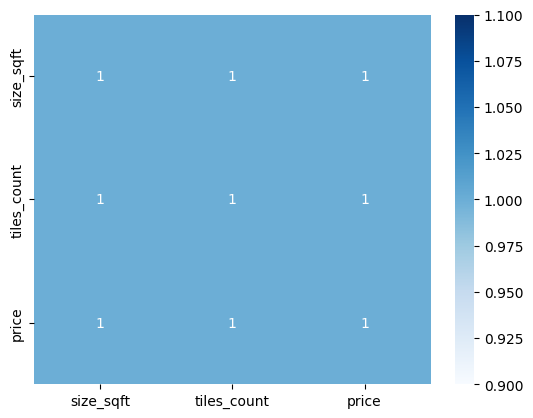

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(correlation_matrix,annot=True,cmap='Blues')
plt.show()

In [ ]:
#removing higly correlated features

upper=correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape),k=1).astype(bool)
)

drop=[column for column in upper.columns if any(upper[column]>0.9)]
print("Columns dropped(i.e highly correlated features) : \n",drop)

Columns dropped(i.e highly correlated features) : 
 ['tiles_count', 'price']


**Scenario: Real Estate Price Prediction**

You are developing a regression model to predict house prices.

Dataset contains:

House Size (sqft)

Number of Tiles

Total Construction Cost

Number of Bedrooms

Market Price

In [ ]:
data1=pd.DataFrame({
    'HouseSize(sqft)': [1000, 1200, 1400, 1600, 1800, 2000, 2200],
    'NumberofTiles': [5000, 6000, 7000, 8000, 9000, 10000, 11000],
    'TotalConstructionCost': [30, 36, 42, 48, 54, 60, 66],
    'NumbeOfBedrooms': [2, 2, 3, 3, 4, 4, 5],
    'MarketPrice': [50, 60, 72, 85, 98, 115, 130]
})
data1

,HouseSize(sqft),NumberofTiles,TotalConstructionCost,NumbeOfBedrooms,MarketPrice
0,1000,5000,30,2,50
1,1200,6000,36,2,60
2,1400,7000,42,3,72
3,1600,8000,48,3,85
4,1800,9000,54,4,98
5,2000,10000,60,4,115
6,2200,11000,66,5,130


After calculating correlation matrix, you find:

House Size and Number of Tiles have 0.98 correlation

Construction Cost is highly correlated (0.95) with House Size

In [ ]:
correlation_matrix1=data1.corr()
print(correlation_matrix)

                       HouseSize(sqft)  NumberofTiles  TotalConstructionCost  \
HouseSize(sqft)               1.000000       1.000000               1.000000   
NumberofTiles                 1.000000       1.000000               1.000000   
TotalConstructionCost         1.000000       1.000000               1.000000   
NumbeOfBedrooms               0.970725       0.970725               0.970725   
MarketPrice                   0.996874       0.996874               0.996874   

                       NumbeOfBedrooms  MarketPrice  
HouseSize(sqft)               0.970725     0.996874  
NumberofTiles                 0.970725     0.996874  
TotalConstructionCost         0.970725     0.996874  
NumbeOfBedrooms               1.000000     0.971368  
MarketPrice                   0.971368     1.000000  


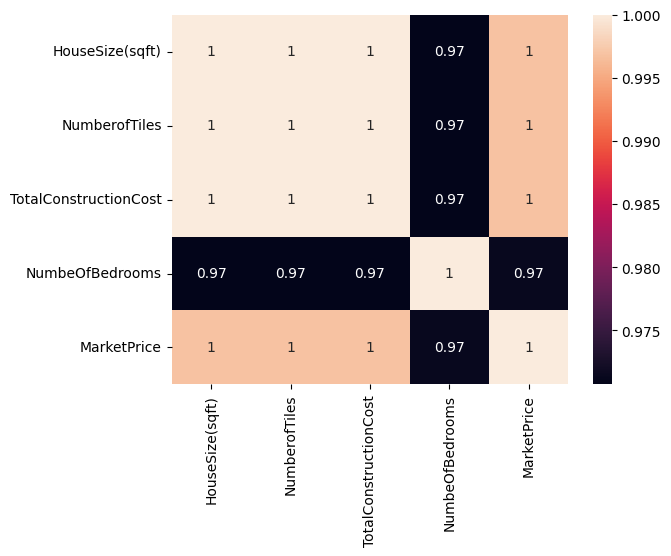

In [ ]:
sns.heatmap(correlation_matrix1,annot=True)
plt.show()

Perform correlation

considering '**MarketPrice**' as input feature

In [ ]:
upper=correlation_matrix1.where(
    np.triu(np.ones(correlation_matrix1.shape),k=1).astype(bool)
)

drop=[column for column in upper.columns if any(upper[column]>0.9)]
print("Columns dropped(i.e highly correlated features) : \n",drop)

Columns dropped(i.e highly correlated features) : 
 ['NumberofTiles', 'TotalConstructionCost', 'NumbeOfBedrooms', 'MarketPrice']


considering '**MarketPrice**' as target feature

In [ ]:
X = data1.drop('MarketPrice', axis=1)
correlation_matrix = X.corr()
upper = correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
)
drop = [column for column in upper.columns if any(abs(upper[column]) > 0.9)]
print("Columns dropped:\n", drop)


Columns dropped:
 ['NumberofTiles', 'TotalConstructionCost', 'NumbeOfBedrooms']


### **Chi-Square Test**

In [ ]:
X=pd.DataFrame({
    'gender':[0,1,0,1,1],
    'married':[1,1,0,0,1],
    'income':[20000,40000,50000,30000,60000]
})
y=[0,1,1,0,1]
X

,gender,married,income
0,0,1,20000
1,1,1,40000
2,0,0,50000
3,1,0,30000
4,1,1,60000


In [ ]:
#chi-square requires non-negative values

from sklearn.feature_selection import chi2,SelectKBest
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)

selector=SelectKBest(score_func=chi2,k=2)
X_new=selector.fit_transform(X_scaled,y)

selected_features=X.columns[selector.get_support()]
print("Selected features : \n",selected_features)

Selected features : 
 Index(['married', 'income'], dtype='object')


**Scenario: Loan Approval Classification**

You are building a classification model to predict whether a loan will be approved.

Dataset features:

Gender (Male/Female)

Marital Status (Yes/No)

Education Level (Graduate/Non-Graduate)

Applicant Income

Property Area (Urban/Rural)

Favorite Color

Loan Status (Approved/Rejected)

In [ ]:
data=pd.DataFrame({
    'Gender': ['Male','Female','Male','Male','Female','Male'],
    'Marital Status': ['Yes','No','Yes','Yes','No','Yes'],
    'Education Level': ['Graduate','Non-Graduate','Graduate',
                        'Graduate','Non-Graduate','Graduate'],
    'Applicant Income': [50000, 30000, 60000, 55000, 32000, 70000],
    'Property Area': ['Urban', 'Rural', 'Urban', 'Urban', 'Rural', 'Urban'],
    'Favorite Color': ['Blue', 'Red', 'Green', 'Blue', 'Pink', 'Green'],
    'Loan Status': ['Approved', 'Rejected', 'Approved',
                    'Approved', 'Rejected', 'Approved']
})
data

,Gender,Marital Status,Education Level,Applicant Income,Property Area,Favorite Color,Loan Status
0,Male,Yes,Graduate,50000,Urban,Blue,Approved
1,Female,No,Non-Graduate,30000,Rural,Red,Rejected
2,Male,Yes,Graduate,60000,Urban,Green,Approved
3,Male,Yes,Graduate,55000,Urban,Blue,Approved
4,Female,No,Non-Graduate,32000,Rural,Pink,Rejected
5,Male,Yes,Graduate,70000,Urban,Green,Approved


You want to identify which categorical features significantly influence loan approval.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in data.columns:
    data[col] = le.fit_transform(data[col])

data

,Gender,Marital Status,Education Level,Applicant Income,Property Area,Favorite Color,Loan Status
0,1,1,0,2,1,0,0
1,0,0,1,0,0,3,1
2,1,1,0,4,1,1,0
3,1,1,0,3,1,0,0
4,0,0,1,1,0,2,1
5,1,1,0,5,1,1,0


In [ ]:
X = data.drop('Loan Status', axis=1)
y = data['Loan Status']

In [ ]:
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)

selector=SelectKBest(score_func=chi2,k=2)
X_new=selector.fit_transform(X_scaled,y)

selected_features=X.columns[selector.get_support()]
print("Selected features : \n",selected_features)

Selected features : 
 Index(['Education Level', 'Property Area'], dtype='object')
